# Hierarchical Clustering using R

In [1]:
# import libraries
library(tm)
library(stringr)
library(wordcloud)
library(slam)
library(quanteda)
library(SnowballC)
library(arules)
library(proxy)
library(cluster)
library(stringi)
library(proxy)
library(Matrix)
library(tidytext)
library(plyr)
library(ggplot2)
library(factoextra)
library(mclust)
library(textstem)
library(amap)
library(networkD3)
library(dendextend)

Warning message:
"package 'tm' was built under R version 4.3.3"
Loading required package: NLP

Warning message:
"package 'NLP' was built under R version 4.3.3"
Warning message:
"package 'wordcloud' was built under R version 4.3.3"
Loading required package: RColorBrewer

Warning message:
"package 'slam' was built under R version 4.3.3"
Warning message:
"package 'quanteda' was built under R version 4.3.3"
Package version: 4.2.0
Unicode version: 13.0
ICU version: 69.1

Parallel computing: 16 of 16 threads used.

See https://quanteda.io for tutorials and examples.


Attaching package: 'quanteda'


The following object is masked from 'package:tm':

    stopwords


The following objects are masked from 'package:NLP':

    meta, meta<-


Warning message:
"package 'arules' was built under R version 4.3.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 4.3.3"

Attaching package: 'arules'


The following object is masked from 'package:tm':

    ins

## NewsAPI

In [73]:
# extract corpus
newsapi <- Corpus(DirSource('corpus_newsapi'))

In [74]:
# create document term matrix
dtm_newsapi <- as.matrix(DocumentTermMatrix(newsapi))

In [75]:
# calculate cosine similarity distance
cosine_newsapi <- dist(dtm_newsapi, method='cosine')

In [76]:
# create clusters
clusters_newsapi <- hclust(cosine_newsapi, method='ward.D2')

In [6]:
# create cuts (2 - 6)
cut_2_newsapi <- cutree(clusters_newsapi, k=2)
cut_3_newsapi <- cutree(clusters_newsapi, k=3)
cut_4_newsapi <- cutree(clusters_newsapi, k=4)
cut_5_newsapi <- cutree(clusters_newsapi, k=5)
cut_6_newsapi <- cutree(clusters_newsapi, k=6)

In [7]:
# create results dataframe
results_newsapi <- data.frame(
    File = rownames(dtm_newsapi),
    cluster_2 = cut_2_newsapi,
    cluster_3 = cut_3_newsapi,
    cluster_4 = cut_4_newsapi,
    cluster_5 = cut_5_newsapi,
    cluster_6 = cut_6_newsapi
)

In [77]:
# create dendrogram object
dend <- as.dendrogram(clusters_newsapi)

In [80]:
# relabel
labels(dend) <- rep("", length(labels(dend)))

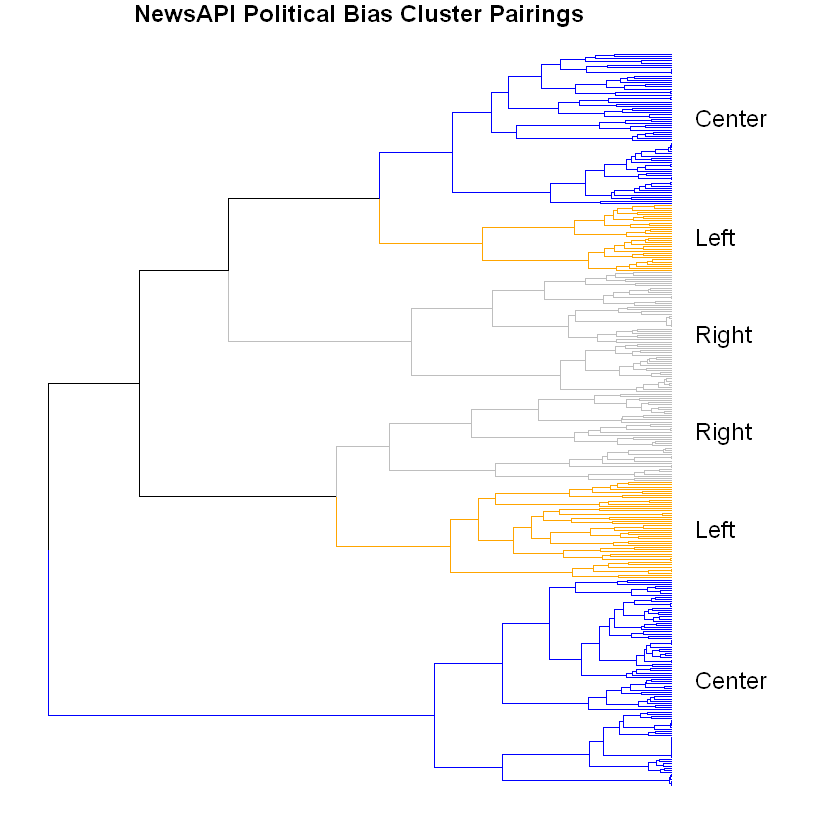

In [89]:
# adjust margins
par(mar=c(1, 1, 1, 1), oma=c(0, 0, 0, 5))

# plot dendrogram
dend %>%
  set("labels_col", value = c("blue", "orange", "grey", "grey", "orange", "blue"), k=6) %>%
  set("branches_k_color", value = c("blue", "orange", "grey", "grey", "orange", "blue"), k=6) %>%
  plot(horiz=TRUE, axes=FALSE, main="NewsAPI Political Bias Cluster Pairings")
abline(v = 350, lty = 2)

# custom labels
mtext("Center", side=4, line=0, at=310, cex=1.2, las=1)
mtext("Center", side=4, line=0, at=50, cex=1.2, las=1)
mtext("Left", side=4, line=0, at=255, cex=1.2, las=1)
mtext("Left", side=4, line=0, at=120, cex=1.2, las=1)
mtext("Right", side=4, line=0, at=210, cex=1.2, las=1)
mtext("Right", side=4, line=0, at=165, cex=1.2, las=1)

## NewsApi - Reddit Base

In [2]:
# extract corpus
newsapi_reddit_base <- Corpus(DirSource('corpus_newsapi_reddit_base'))

In [6]:
# create document term matrix
dtm_newsapi_reddit_base <- DocumentTermMatrix(newsapi_reddit_base)

In [9]:
# calculate tfidf
tfidf_newsapi_reddit_base <- as.matrix(weightTfIdf(dtm_newsapi_reddit_base))

In [12]:
# calculate cosine similarity distance
cosine_newsapi_reddit_base <- dist(tfidf_newsapi_reddit_base, method='cosine')

In [13]:
# create clusters
clusters_newsapi_reddit_base <- hclust(cosine_newsapi_reddit_base, method='ward.D2')

In [15]:
# create cuts (2 - 6)
cut_2_newsapi_reddit_base <- cutree(clusters_newsapi_reddit_base, k=2)
cut_3_newsapi_reddit_base <- cutree(clusters_newsapi_reddit_base, k=3)
cut_4_newsapi_reddit_base <- cutree(clusters_newsapi_reddit_base, k=4)
cut_5_newsapi_reddit_base <- cutree(clusters_newsapi_reddit_base, k=5)
cut_6_newsapi_reddit_base <- cutree(clusters_newsapi_reddit_base, k=6)

In [16]:
# create results dataframe
results_newsapi_reddit_base <- data.frame(
    File = rownames(tfidf_newsapi_reddit_base),
    cluster_2 = cut_2_newsapi_reddit_base,
    cluster_3 = cut_3_newsapi_reddit_base,
    cluster_4 = cut_4_newsapi_reddit_base,
    cluster_5 = cut_5_newsapi_reddit_base,
    cluster_6 = cut_6_newsapi_reddit_base
)

In [17]:
# save results dataframe
write.csv(results_newsapi_reddit_base, 'hierarchical_results/hierarchical_newsapi_reddit_base.csv', row.names=FALSE)

## NewsApi - Reddit Author

In [18]:
# extract corpus
newsapi_reddit_author <- Corpus(DirSource('corpus_newsapi_reddit_author'))

In [19]:
# create document term matrix
dtm_newsapi_reddit_author <- DocumentTermMatrix(newsapi_reddit_author)

In [20]:
# calculate tfidf
tfidf_newsapi_reddit_author <- as.matrix(weightTfIdf(dtm_newsapi_reddit_author))

In [21]:
# calculate cosine similarity distance
cosine_newsapi_reddit_author <- dist(tfidf_newsapi_reddit_author, method='cosine')

In [22]:
# create clusters
clusters_newsapi_reddit_author <- hclust(cosine_newsapi_reddit_author, method='ward.D2')

In [23]:
# create cuts (2 - 6)
cut_2_newsapi_reddit_author <- cutree(clusters_newsapi_reddit_author, k=2)
cut_3_newsapi_reddit_author <- cutree(clusters_newsapi_reddit_author, k=3)
cut_4_newsapi_reddit_author <- cutree(clusters_newsapi_reddit_author, k=4)
cut_5_newsapi_reddit_author <- cutree(clusters_newsapi_reddit_author, k=5)
cut_6_newsapi_reddit_author <- cutree(clusters_newsapi_reddit_author, k=6)

In [24]:
# create results dataframe
results_newsapi_reddit_author <- data.frame(
    File = rownames(tfidf_newsapi_reddit_author),
    cluster_2 = cut_2_newsapi_reddit_author,
    cluster_3 = cut_3_newsapi_reddit_author,
    cluster_4 = cut_4_newsapi_reddit_author,
    cluster_5 = cut_5_newsapi_reddit_author,
    cluster_6 = cut_6_newsapi_reddit_author
)

In [25]:
# save results dataframe
write.csv(results_newsapi_reddit_author, 'hierarchical_results/hierarchical_newsapi_reddit_author.csv', row.names=FALSE)

## NewsApi - Reddit Threads

In [32]:
# extract corpus
newsapi_reddit_thread <- Corpus(DirSource('corpus_newsapi_reddit_thread'))

In [35]:
# create document term matrix
dtm_newsapi_reddit_thread <- DocumentTermMatrix(newsapi_reddit_thread)

In [36]:
# calculate tfidf
tfidf_newsapi_reddit_thread <- as.matrix(weightTfIdf(dtm_newsapi_reddit_thread))

In [37]:
# calculate cosine similarity distance
cosine_newsapi_reddit_thread <- dist(tfidf_newsapi_reddit_thread, method='cosine')

In [38]:
# create clusters
clusters_newsapi_reddit_thread <- hclust(cosine_newsapi_reddit_thread, method='ward.D2')

In [39]:
# create cuts (2 - 6)
cut_2_newsapi_reddit_thread <- cutree(clusters_newsapi_reddit_thread, k=2)
cut_3_newsapi_reddit_thread <- cutree(clusters_newsapi_reddit_thread, k=3)
cut_4_newsapi_reddit_thread <- cutree(clusters_newsapi_reddit_thread, k=4)
cut_5_newsapi_reddit_thread <- cutree(clusters_newsapi_reddit_thread, k=5)
cut_6_newsapi_reddit_thread <- cutree(clusters_newsapi_reddit_thread, k=6)

In [40]:
# create results dataframe
results_newsapi_reddit_thread <- data.frame(
    File = rownames(tfidf_newsapi_reddit_thread),
    cluster_2 = cut_2_newsapi_reddit_thread,
    cluster_3 = cut_3_newsapi_reddit_thread,
    cluster_4 = cut_4_newsapi_reddit_thread,
    cluster_5 = cut_5_newsapi_reddit_thread,
    cluster_6 = cut_6_newsapi_reddit_thread
)

In [41]:
# save results dataframe
write.csv(results_newsapi_reddit_thread, 'hierarchical_results/hierarchical_newsapi_reddit_thread.csv', row.names=FALSE)

## NewsApi - Reddit Subreddits

In [46]:
# extract corpus
newsapi_reddit_subreddit <- Corpus(DirSource('corpus_newsapi_reddit_subreddit'))

In [47]:
# create document term matrix
dtm_newsapi_reddit_subreddit <- DocumentTermMatrix(newsapi_reddit_subreddit)

In [48]:
# calculate tfidf
tfidf_newsapi_reddit_subreddit <- as.matrix(weightTfIdf(dtm_newsapi_reddit_subreddit))

In [49]:
# calculate cosine similarity distance
cosine_newsapi_reddit_subreddit <- dist(tfidf_newsapi_reddit_subreddit, method='cosine')

In [50]:
# create clusters
clusters_newsapi_reddit_subreddit <- hclust(cosine_newsapi_reddit_subreddit, method='ward.D2')

In [51]:
# create cuts (2 - 6)
cut_2_newsapi_reddit_subreddit <- cutree(clusters_newsapi_reddit_subreddit, k=2)
cut_3_newsapi_reddit_subreddit <- cutree(clusters_newsapi_reddit_subreddit, k=3)
cut_4_newsapi_reddit_subreddit <- cutree(clusters_newsapi_reddit_subreddit, k=4)
cut_5_newsapi_reddit_subreddit <- cutree(clusters_newsapi_reddit_subreddit, k=5)
cut_6_newsapi_reddit_subreddit <- cutree(clusters_newsapi_reddit_subreddit, k=6)

In [52]:
# create results dataframe
results_newsapi_reddit_subreddit <- data.frame(
    File = rownames(tfidf_newsapi_reddit_subreddit),
    cluster_2 = cut_2_newsapi_reddit_subreddit,
    cluster_3 = cut_3_newsapi_reddit_subreddit,
    cluster_4 = cut_4_newsapi_reddit_subreddit,
    cluster_5 = cut_5_newsapi_reddit_subreddit,
    cluster_6 = cut_6_newsapi_reddit_subreddit
)

In [53]:
# save results dataframe
write.csv(results_newsapi_reddit_subreddit, 'hierarchical_results/hierarchical_newsapi_reddit_subreddit.csv', row.names=FALSE)

In [55]:
news_subreddit <- as.dendrogram(clusters_newsapi_reddit_subreddit)

In [57]:
# function to rename the labels
labels(news_subreddit) <- sapply(labels(news_subreddit), function(x) {
  if (startsWith(x, "Reddit")) {
    return("Reddit")
  } else if (startsWith(x, "NewsAPI")) {
    return("NewsAPI")
  } else {
    # retain label if not Reddit or NewsAPI  
    return(x)
  }
})

In [68]:
# function to color the labels
label_colors <- function(node) {
  label <- attr(node, "label")
  if (!is.null(label)) {
    if (label == "Reddit") {
      attr(node, "nodePar") <- list(lab.col = "red")
    } else if (label == "NewsAPI") {
      attr(node, "nodePar") <- list(lab.col = "blue")
    }
  }
  return(node)
}

In [69]:
# apply the color function to the dendrogram labels
news_subreddit <- dendrapply(news_subreddit, label_colors)

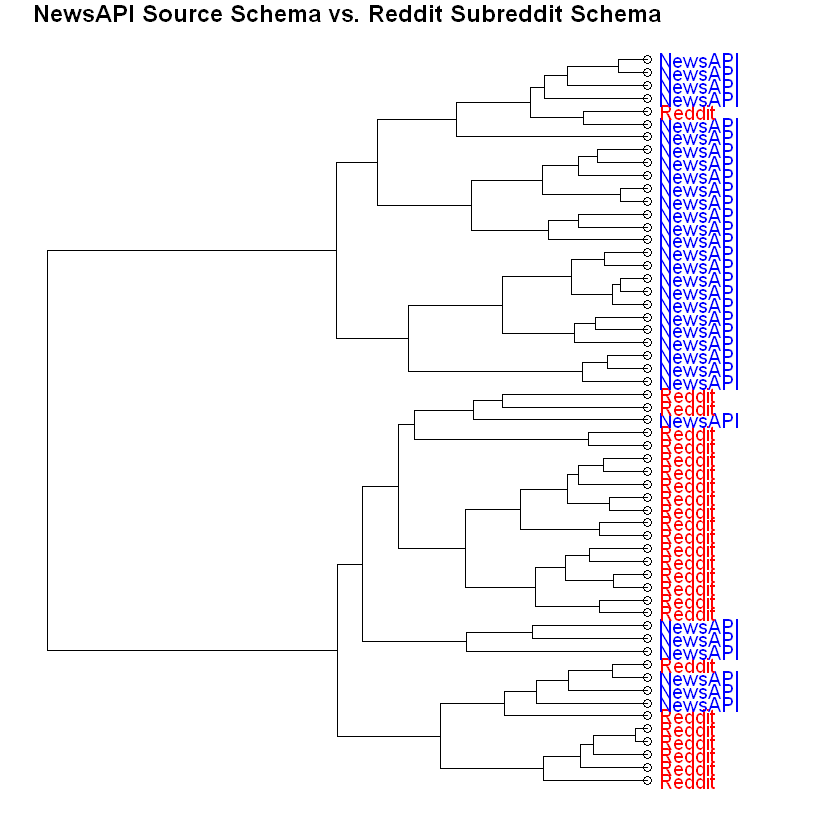

In [72]:
# plot dendrogram with altered labels
par(mar = c(1, 1, 1, 7))
plot(news_subreddit, horiz = TRUE, axes = FALSE, main="NewsAPI Source Schema vs. Reddit Subreddit Schema")
abline(v = 350, lty = 2)

---